In [121]:
import pandas as pd
import numpy as np
training_data=pd.read_csv("train.csv")
Y=training_data["SalePrice"]
del training_data["SalePrice"]
X=training_data
X.shape

(1168, 10)

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[ 0.65669017,  0.56985198, -1.04528346, ...,  0.92852386,
        -1.51571947, -1.67745507],
       [ 0.65669017,  0.23765885, -1.04528346, ...,  0.29725735,
        -0.98871868, -1.67745507],
       [-0.81127943, -0.3923626 ,  0.30376746, ..., -0.33400916,
        -1.38396928,  0.78721474],
       ...,
       [-0.81127943, -1.39848776, -1.04528346, ..., -0.96527568,
        -0.75815584, -1.67745507],
       [-0.07729463,  0.26629619, -1.04528346, ...,  0.92852386,
        -0.52759299,  0.54558045],
       [ 0.65669017, -0.15180895,  0.30376746, ..., -0.96527568,
         0.62522124,  0.25561929]])

In [123]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)

In [124]:
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [125]:
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [126]:
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [127]:
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    

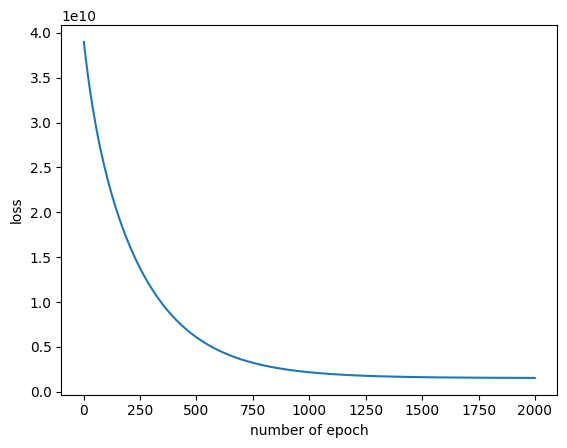

In [128]:
import matplotlib.pyplot as plt
w,b=gradient_descent(X_transform,Y)

In [131]:
print("weight:",w)
print("bias:",b)

weight: [24258.97848737 18609.8749128   7097.23220959  6088.94815029
  8817.80038067  6852.47775194  -158.03806309  5486.39396053
  6670.31838981  6953.41782342]
bias: 177917.6337908714


In [132]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)


In [133]:
y_pred=predict(X_transform)
y_pred

array([172269.3407019 , 160198.97774451, 141060.18427699, ...,
        84490.62208566, 183734.76371085, 206550.29488738])

In [134]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,184000,172269.3
1,164000,160199.0
2,130000,141060.2
3,555000,385979.7
4,176000,196556.9
...,...,...
1163,149500,154101.2
1164,160000,180693.8
1165,115000,84490.6
1166,165500,183734.8


177917.6337908714

In [110]:
test_data=pd.read_csv('test.csv')
n=test_data["SalePrice"]
del test_data["SalePrice"]
m=test_data
M_transform=sc.fit_transform(m)
M_transform

array([[ 1.31834832,  0.9022699 ,  1.64321655, ...,  0.85919977,
         1.14386966,  1.00514251],
       [-0.05160794,  0.26525808, -0.9574297 , ..., -0.26585105,
        -0.483793  ,  0.12316771],
       [ 0.63337019, -0.50556391,  0.34289343, ..., -1.39090187,
         1.10996002,  0.95614391],
       ...,
       [-0.05160794, -1.21230779,  0.34289343, ..., -1.39090187,
         1.04214074,  0.85814671],
       [ 0.63337019, -0.42452394,  0.34289343, ..., -0.26585105,
         1.1777793 ,  1.0541411 ],
       [-0.05160794, -0.01367017,  0.34289343, ...,  0.85919977,
         1.10996002,  1.0541411 ]])

In [136]:
a=np.dot(M_transform,w)
n_pred=a+b
n_pred



array([265723.61532579, 179969.59063275, 172001.30369099, 178543.28875404,
        77581.6614211 , 107105.02587462, 113654.91769727, 191916.18139846,
       204425.68205256, 155165.09513918, 212750.49595869, 120993.40647882,
       167933.44567936, 143102.47462403, 276752.45202021, 163648.86536323,
       200297.77608485, 225217.7858969 , 150197.36626188, 148375.28650198,
       229145.20358558, 265813.68465671, 193641.29231719, 128907.4000525 ,
       236141.46114129, 145507.45331419, 208733.18882123,  99270.94149017,
       143558.47628448, 166332.0728703 , 280737.74404918, 185433.07312208,
       180146.88136846, 130099.56156408, 144318.27238659, 149681.53621899,
        14691.01349052, 235879.2402676 , 356616.68953573, 181297.54809258,
       137318.49200776, 111099.74962162,  63568.30305644,  64228.96153418,
       144185.49356398, 160492.79221654,  87935.25115954, 232358.46064862,
       116405.36641536, 155027.7802991 , 127556.67075374, 226696.71367264,
       251446.50238013, 2

In [138]:
df_preds=pd.DataFrame()
df_preds["n_actual"]=n
df_preds["n_predicted"]=np.round(n_pred,1)
df_preds

,n_actual,n_predicted
0,281000,265723.6
1,139000,179969.6
2,147400,172001.3
3,153500,178543.3
4,86000,77581.7
...,...,...
287,158000,181966.8
288,118000,125268.2
289,140000,150894.6
290,159895,205892.1


In [140]:
e=df_preds["n_actual"].sum()
f=df_preds["n_predicted"].sum()
acc=(f/e)*100
acc

99.00174577644766